<a href="https://colab.research.google.com/github/TentaTonny/WhereIsWaldo_Team18/blob/main/whereIsWaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import torch

In [108]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
! git clone https://github.com/vc1492a/Hey-Waldo.git

In [17]:
data_path = '/content/gdrive/MyDrive/Hey-Waldo/'

In [109]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
dataset_64 = datasets.ImageFolder(f'{data_path}64', transform=transform)
dataset_128 = datasets.ImageFolder(f'{data_path}128', transform=transform)

# Combine datasets
combined_dataset = torch.utils.data.ConcatDataset([dataset_64, dataset_128])

# Create a dataloader
train_loader = DataLoader(combined_dataset, batch_size=10, shuffle=True)

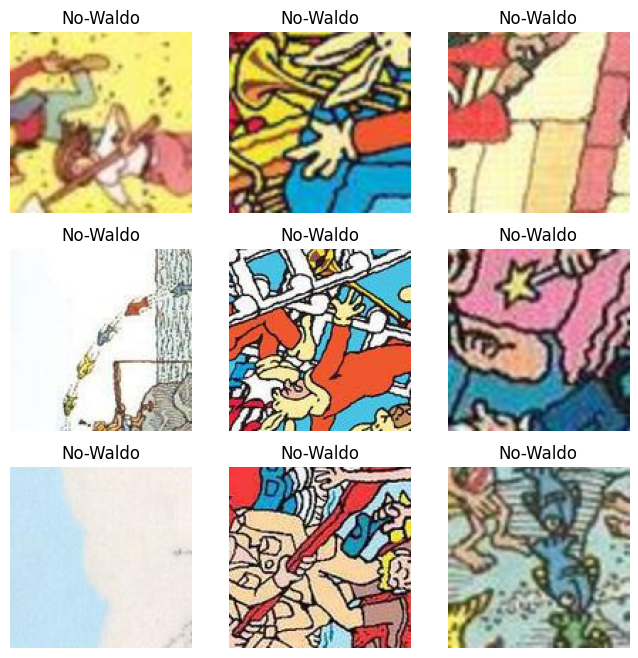

In [114]:
test_loader = DataLoader(combined_dataset, batch_size=9, shuffle=True)
train_features, train_labels = next(iter(test_loader))

labels_map = {
    0: "No-Waldo",
    1: "Waldo",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(len(train_features)):
    img, label = train_features[i], train_labels[i]
    figure.add_subplot(rows, cols, (i + 1))
    plt.title(labels_map[label.item()])
    plt.axis("off")
    plt.imshow(img.T, cmap="gray")
plt.show()

In [117]:
labels = []
for i in range(len(combined_dataset)):
  labels.append(combined_dataset[i][1]) #add label as int

In [123]:
print(f'# images containing Waldo {labels.count(1)}')
print(f'# images not containing Waldo {labels.count(0)}')
print(f'# images in total {len(labels)}')

# images containing Waldo 66
# images not containing Waldo 6654
# images in total 6720
